## Regresion lineal(50_startups dataset) (50%)

Dataset Description:
The dataset contains data from 50 startups regarding various expenses and profits. The dataset includes the following:

R&D spend: Company expenditure on research and development
Administration: Company expenditure on administration
Marketing spend: Company expenditure on marketing
State: Location of the company
Profit: Company profits

In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
#Load the Dataset
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\MACHINE_LEARNING\SEMANA_1\Lab1\datasets
df=pd.read_csv('50_Startups.csv')
df.head(5)


C:\Users\duart\OneDrive\Documentos\UNIANDES\MACHINE_LEARNING\SEMANA_1\Lab1\datasets


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,NaN,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [73]:
#Perform an inspection of the dataset, see how many null values there are, the description and the correlation between its variables
df.isnull().sum()

R&D Spend          2
Administration     3
Marketing Spend    2
State              0
Profit             0
dtype: int64

In [74]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,48.000000,47.000000,48.000000,50.000000
mean,71282.708333,120845.415957,206952.604583,112012.639200
std,44784.259777,28813.053635,122816.483981,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,36107.465000,102101.520000,125324.665000,90138.902500
50%,69820.065000,121597.550000,208157.655000,107978.190000
75%,96160.860000,145303.820000,298932.675000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [75]:
df.corr()

C:\Users\duart\AppData\Local\Temp\ipykernel_17840\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.213253,0.714125,0.970801
Administration,0.213253,1.000000,-0.036690,0.198683
Marketing Spend,0.714125,-0.036690,1.000000,0.762248
Profit,0.970801,0.198683,0.762248,1.000000


In [76]:
#Use the mean to fill in those values that are null
df=df.fillna(df.mean())
df.isnull().sum()


C:\Users\duart\AppData\Local\Temp\ipykernel_17840\3775979506.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [77]:
# apply the label encoder to the categorical data

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

ct=make_column_transformer([OneHotEncoder(sparse=False), ['State']], remainder='passthrough')
df_ct=ct.fit_transform(df)

df_ct= pd.DataFrame(data=df_ct, columns=ct.get_feature_names_out())
df_ct.head(5)

c:\Users\duart\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,onehotencoder__State_California,onehotencoder__State_Florida,onehotencoder__State_New York,remainder__R&D Spend,remainder__Administration,remainder__Marketing Spend,remainder__Profit
0,0.0,0.0,1.0,165349.200000,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,71282.708333,151377.59,443898.53,191792.06
2,0.0,1.0,0.0,153441.510000,101145.55,407934.54,191050.39
3,0.0,0.0,1.0,144372.410000,118671.85,383199.62,182901.99
4,0.0,1.0,0.0,142107.340000,91391.77,366168.42,166187.94


In [78]:
# separate the dataset, the dependent variable (target) will be 'Profit', the others will be independent

from sklearn.model_selection import train_test_split

X=df_ct.drop('remainder__Profit', axis=1)
y=df_ct['remainder__Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

print(f'train: {X_train.shape}')
print(f'test: {X_test.shape}')
print(f'val: {X_val.shape}')


train: (37, 6)
test: (6, 6)
val: (7, 6)


In [79]:
# Get the columns names
name_columns=X_train.columns

In [80]:
'''
WARNING: When scaling validation and test data, we only use the transform method. 
(The fit() method learns information from the data, such as its mean, standard deviation, weights, etc. 
The transform() method applies a function to the data based on the information learned in the fit() method.)
We only use the transform method because we want to use the statistical properties learned from the training
data to ensure that the test and validation data are not biased by their own statistics.
'''
# Standardize the data using the StandardScaler
from sklearn.preprocessing import StandardScaler, Normalizer
sc=StandardScaler()
X_train=sc.fit_transform(X_train) # we use fit_transform in the train set to Learn the parameters and apply the transformation to new data	
X_test=sc.transform(X_test) # we use transform in the test set to apply the transformation to new data
X_val=sc.transform(X_val) # we use transform in the validation set to apply the transformation to new data
#Solo se usa transform para que el StandarScalet no aprenda de los datos nuevos, ya que seria contraproducente

# Convert the data to a dataframe
X_train = pd.DataFrame(data=X_train, columns=name_columns)
X_test = pd.DataFrame(data=X_test, columns=name_columns)
X_val = pd.DataFrame(data=X_val, columns=name_columns)


### Training the Model

In [81]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

### Evaluate the model and Analyze the result


In [82]:
#perform prediction on the test set and compare results between the real and the predicted values

y_pred=linear_model.predict(X_test)
results = pd.DataFrame(data={'y_pred':y_pred, 'y_real':y_test})

results



,y_pred,y_real
25,105233.291360,107404.34
17,141595.607704,125370.37
28,100938.769054,103282.38
0,211237.706697,192261.83
34,101442.399800,96712.80
45,43733.468061,64926.08


In [86]:
#observe the coefficient values and analyze which of the independent variables has more weight
coeficientes=pd.DataFrame(data={'Variable':linear_model.feature_names_in_, 'Coefficient':linear_model.coef_})
coeficientes

,Variable,Coefficient
0,onehotencoder__State_California,1194.646383
1,onehotencoder__State_Florida,-1900.301596
2,onehotencoder__State_New York,791.034954
3,remainder__R&D Spend,29876.481194
4,remainder__Administration,1939.651733
5,remainder__Marketing Spend,12553.973339


In [87]:
# get the mean squared error, mean absolute error and r2_score metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)

print(f'Error cuadratico medio: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Error absoluto medio: {mae}')

rtwo_score = r2_score(y_test, y_pred)
print(f'r2 score: {rtwo_score}')

Error cuadratico medio: 184174019.08477178
Error absoluto medio: 10939.664287575493
r2 score: 0.8787497948050431


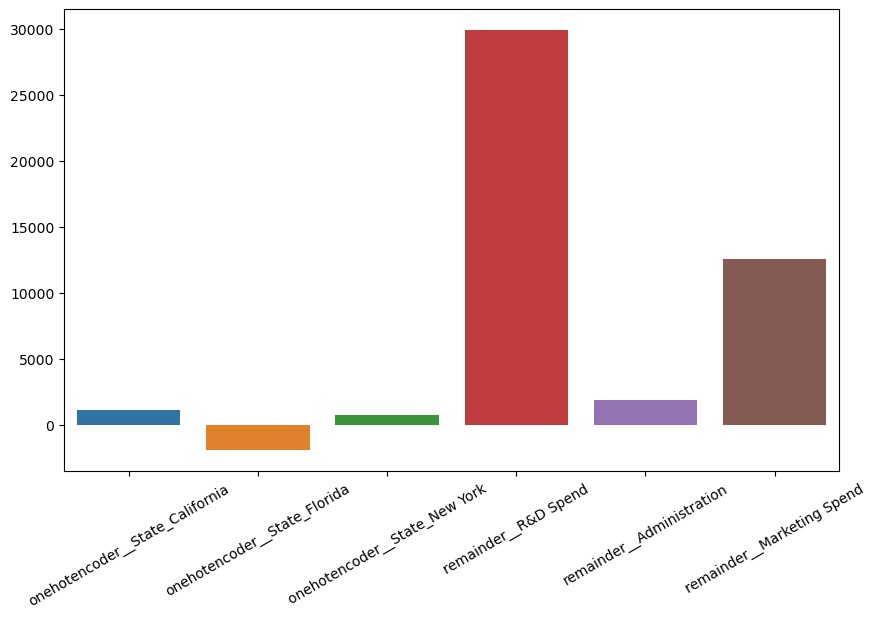

In [88]:
# plot the results and conclusions of the model
plt.figure(figsize=(10,6))
ax=sns.barplot(x=linear_model.feature_names_in_,y=linear_model.coef_)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.show()

'''
This figure shows that the variable that has the most weight is the variable 'R&D Spend'
'''

<AxesSubplot: >

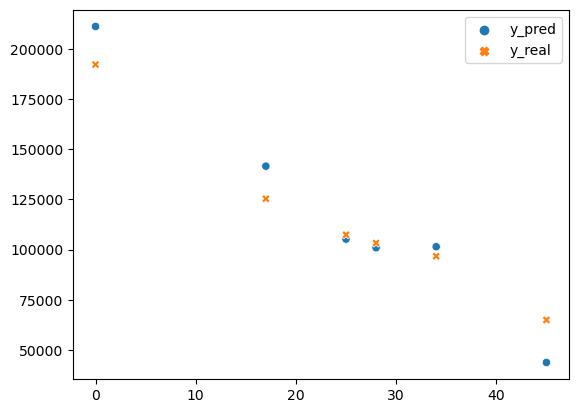

In [92]:
''' it shows the results of the prediction and the real values of the test set '''

sns.scatterplot(results)

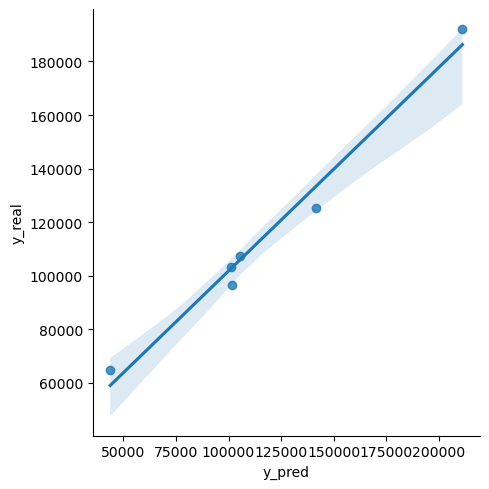

In [97]:
sns.lmplot(x='y_pred', y='y_real',data=results)